In [25]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [26]:
train_dir = './train'
test_dir = './test'

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │     1,382,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,866 (5.35 MB)

 Trainable params: 1,401,866 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [42]:
#steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

In [43]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [56]:
history = model.fit(
    train_generator,
    steps_per_epoch=63,
    #steps_per_epoch=75,
    epochs=15,
    validation_data=test_generator,
    validation_steps=validation_steps,
    #callbacks=[early_stopping]  # Usar EarlyStopping para evitar sobreajuste
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 477ms/step - accuracy: 0.8472 - loss: 0.3412 - val_accuracy: 0.7828 - val_loss: 0.4324
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 402ms/step - accuracy: 0.8294 - loss: 0.3725 - val_accuracy: 0.8750 - val_loss: 0.2733
Epoch 3/15


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 509ms/step - accuracy: 0.8585 - loss: 0.3392 - val_accuracy: 0.8417 - val_loss: 0.3541
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.8367 - loss: 0.3689 - val_accuracy: 0.8750 - val_loss: 0.2440
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 617ms/step - accuracy: 0.8456 - loss: 0.3633 - val_accuracy: 0.8417 - val_loss: 0.3374
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 446ms/step - accuracy: 0.8375 - loss: 0.3672 - val_accuracy: 0.8125 - val_loss: 0.3505
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 570ms/step - accuracy: 0.8485 - loss: 0.3467 - val_accuracy: 0.8100 - val_loss: 0.4028
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 549ms/step - accuracy: 0.8455 - loss: 0.3484 - val_accuracy: 0.7500 - val_loss: 0.4013
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 878ms/step - accuracy: 0.8303 - loss: 0.3780 - val_accuracy: 0.8422 - val_loss: 0.3505
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 614ms/step - accuracy: 0.8377 - loss: 0.3459 - val_accuracy: 0.87

In [57]:
# Guardar el modelo completo
model.save('models/13_cnn.h5')

In [69]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [70]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False  # No mezclar el orden
)


Found 2000 images belonging to 2 classes.


In [71]:
# Obtener predicciones (probabilidades) en el conjunto de prueba
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step


In [73]:
# Etiquetas verdaderas del conjunto de prueba
y_true = test_generator.classes[:len(y_pred)]  # Asegúrate de que las etiquetas coinciden en tamaño

In [74]:
# Binarizar las etiquetas verdaderas para la curva ROC (necesitamos las etiquetas en formato binario)
y_true_bin = label_binarize(y_true, classes=[0, 1])

## Matriz de confusión

In [75]:
# --- MATRIZ DE CONFUSIÓN ---
cm = confusion_matrix(y_true, y_pred)

print('Matriz de confusión:')
print(cm)

Matriz de confusión:
[[863 137]
 [127 857]]


## Curva ROC

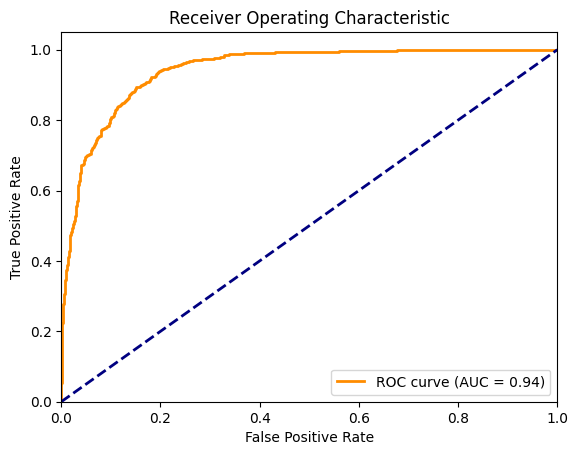

In [76]:
# Para calcular la curva ROC, tomamos la columna de la clase positiva (probabilidades de la clase 1)
fpr, tpr, thresholds = roc_curve(y_true_bin, Y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()